# OPTIMIZE MARKET EXPENSE

In this project, we embark on a journey to optimize marketing expenses for Yandex.Afisha, a platform that offers a variety of entertainment options. Armed with valuable insights from server logs, order records, and marketing expense data, we set out to comprehend the intricacies of user behavior and purchasing patterns

## Objectives

The primary goal of this initiative is to conduct a comprehensive analysis that delves into several key aspects of our business, thereby providing us with actionable insights to drive growth and success. Specifically, we aim to examine:

-User Interaction and Engagement: We will deeply explore how users engage with our product, shedding light on usage patterns, feature preferences, and overall interaction dynamics. This understanding will empower us to enhance user experiences and tailor our offerings more effectively.

-Conversion Point Identification: Through meticulous analysis, we will pinpoint the critical junctures at which users transition from mere engagement to becoming paying customers. Uncovering these conversion triggers will enable us to optimize our onboarding strategies and accelerate revenue generation.

-Customer Value Assessment: By quantifying the monetary value each customer contributes throughout their lifecycle, we gain insights into our customer segments' profitability. This knowledge will guide us in prioritizing efforts towards high-value segments and maximizing overall revenue.

-Payback Period Determination: Our analysis will also uncover the timeframe within which a customer's spending surpasses the costs of acquisition, leading to a positive return on investment. Armed with this insight, we can better allocate our marketing resources and optimize our strategies.

In essence, this initiative will empower us to make informed decisions, foster a deeper understanding of our customer base, and strategically allocate resources to achieve sustained growth and profitability.







## Business Interest


1.Product:

-Quantify Daily, Weekly, and Monthly Active Users: Determine the frequency of user engagement.
-Measure Sessions per Day: Understand user interaction frequency, considering multiple sessions per user.
-Evaluate Session Duration: Analyze the duration of each user session.
-Assess User Retention: Calculate the rate at which users continue engaging with the product.

2.Sales:

-Identify Conversion Timing: Determine the time between user registration and becoming a customer, enabling effective cohort comparison.
-Track Order Frequency: Measure the number of orders made within specific timeframes.
-Analyze Average Purchase Size: Understand the typical amount spent per order.
-Calculate Customer Lifetime Value (LTV): Quantify the monetary contribution of each customer over their entire relationship with the business.

3.Marketing:

-Measure Total Marketing Spend: Understand the overall investment in marketing activities.
-Breakdown of Expenses by Source: Determine costs associated with different marketing channels.
-Evaluate Return on Investment (ROI): Assess the effectiveness and profitability of marketing efforts.
-Calculate Customer Acquisition Cost (CAC): Determine the cost of acquiring customers from different sources.

These insights will provide a holistic view of our product's performance, sales dynamics, and the impact of marketing efforts, enabling us to make informed decisions and optimize strategies for growth and success.







## Table of contens


1.Download the data and prepare it for analysis

2.Make reports and calculate metrics

-Products

-Sales

-Marketing

3.Write a conclusion: advise marketing experts how much money to invest and where.

### Download the data and prepare it for analysis

In [1]:
# Loading all the libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the first 500 rows of data from visits_log_us.csv 
try:
    visit_log=pd.read_csv('/datasets/visits_log_us.csv',nrows=500)
except:
    visit_log=pd.read_csv('visits_log_us.csv',nrows=500)

In [3]:
#analyze the visit_log file using info method
visit_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [4]:
#Take the Device column. Find the number of unique values in the column and how they are distributed
visit_log['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

In [5]:
# Device field has only 2 values so it looks like a category field, 
# while Start Ts and End Ts are dates.
visit_log = pd.read_csv(
    'visits_log_us.csv',nrows=500,
    dtype={'Device':'category'},
    parse_dates=['Start Ts', 'End Ts'],
) 

In [6]:
#check on visit_log data set
visit_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.5 KB


Now we are ready to load the whole data frame

In [7]:
#load the whole data frame
visit_log = pd.read_csv(
    'visits_log_us.csv',
    dtype={'Device':'category'},
    parse_dates=['Start Ts', 'End Ts'],
) 

In [8]:
# Rename columns to lowcase names without spaces
visit_log.columns = ['device','end_ts','source_id', 'start_ts', 'uid']

In [9]:
#check the info of the dataset
visit_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [10]:
#check on number of duplicate value
print(visit_log.duplicated().sum()) 

0


In [11]:
# check start_ts date range to make sure it is within June 2017 through May 2018
visit_log['start_ts'].describe(datetime_is_numeric=True)

count                           359400
mean     2017-12-18 06:17:32.010517760
min                2017-06-01 00:01:00
25%                2017-10-15 09:41:00
50%                2017-12-18 18:46:00
75%                2018-02-28 09:54:00
max                2018-05-31 23:59:00
Name: start_ts, dtype: object

In [12]:
#examine end_ts date range to make sure it is within June 2017 through May 2018
visit_log['end_ts'].describe(datetime_is_numeric=True)

count                           359400
mean     2017-12-18 06:28:15.036205056
min                2017-06-01 00:02:00
25%                2017-10-15 09:45:45
50%                2017-12-18 18:59:30
75%                2018-02-28 10:08:15
max                2018-06-01 01:26:00
Name: end_ts, dtype: object

The 'end_ts' column contains rows with dates in June 2018, which are not within the scope of our analysis. We need to count how many rows have dates in June 2018 and then filter them out."


In [13]:
#count number of end_ts which is happened after May 2018
visit_log[visit_log['end_ts'] > pd.to_datetime('2018-05-31 23:59:59')]

device              end_ts  source_id            start_ts  \
2330    desktop 2018-06-01 00:05:00          2 2018-05-31 23:30:00   
43215   desktop 2018-06-01 00:13:00          4 2018-05-31 23:46:00   
46667   desktop 2018-06-01 00:13:00          5 2018-05-31 23:48:00   
154728  desktop 2018-06-01 00:09:00          2 2018-05-31 22:52:00   
198329  desktop 2018-06-01 00:11:00          3 2018-05-31 23:59:00   
216791    touch 2018-06-01 00:06:00          5 2018-05-31 23:45:00   
263781  desktop 2018-06-01 00:25:00          1 2018-05-31 23:59:00   
269213    touch 2018-06-01 00:12:00         10 2018-05-31 23:59:00   
288563    touch 2018-06-01 00:01:00          4 2018-05-31 23:37:00   
299620  desktop 2018-06-01 00:04:00          4 2018-05-31 23:59:00   
342205    touch 2018-06-01 01:26:00          1 2018-05-31 23:44:00   
355366  desktop 2018-06-01 00:00:00          4 2018-05-31 23:54:00   

                         uid  
2330     5300693976971713685  
43215   12296626599487328624  
46667    1107134732939577311  
154728  12484396335714047199  
198329   3720373600909378583  
216791   9951896961656595558  
263781   4906562732540547408  
269213  10723414689244282024  
288563   1094281763368510391  
299620     83872787173869366  
342205  13670831770959132678  
355366  17972575701705277137

In [14]:
#filter the data
visit_log = visit_log[visit_log['end_ts'] <= pd.to_datetime('2018-05-31 23:59:59')]

In [15]:
# reexamine the dates to make sure there is no more date before May 31th
visit_log['end_ts'].describe(datetime_is_numeric=True)

count                           359388
mean     2017-12-18 06:20:19.773926912
min                2017-06-01 00:02:00
25%                2017-10-15 09:43:00
50%                2017-12-18 18:55:30
75%                2018-02-28 09:53:15
max                2018-05-31 23:59:00
Name: end_ts, dtype: object

In [16]:
# let's check that the data in visits is correct, e.g. start_ts is always <= end_ts 
count_valid_sessions = (visit_log['start_ts'] > visit_log['end_ts']).sum()
print("Number of invalid sessions:", count_valid_sessions)

Number of invalid sessions: 2


In [17]:
#filter out invalid session with end_ts > start_ts
visit_log = visit_log[visit_log['start_ts'] <= visit_log['end_ts']]
#recheck  data in visits is correct, e.g. start_ts is always <= end_ts 
count_valid_sessions = (visit_log['start_ts'] > visit_log['end_ts']).sum()
print("Number of invalid sessions:", count_valid_sessions)

Number of invalid sessions: 0


In [18]:
#look at a sample of data for first 5 rows
print(visit_log.head(5))

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [19]:
#Load data orders_log_us.csv
try:
    order_log=pd.read_csv('/datasets/orders_log_us.csv',nrows=500)
except:
    order_log=pd.read_csv('orders_log_us.csv',nrows=500)

In [20]:
#analyze the order_log file using info method
order_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


Buy Ts should be in the datetime64 format as it represents the order date and time.

In [21]:
# while Buy Ts is date.
order_log = pd.read_csv(
    'orders_log_us.csv',
    nrows=500,
    parse_dates=['Buy Ts'],
) 
order_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   500 non-null    datetime64[ns]
 1   Revenue  500 non-null    float64       
 2   Uid      500 non-null    uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 11.8 KB


In [22]:
#let load entire order_log dataset
order_log = pd.read_csv(
    'orders_log_us.csv',
    parse_dates=['Buy Ts'],
) 
order_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [23]:
#change to the column name so it won't leave any space
order_log.columns=['buy_ts', 'revenue', 'uid']

In [24]:
#check on number of duplicate value
print(order_log.duplicated().sum()) 

0


In [25]:
# check buy_ts date range to make sure it is within June 2017 through May 2018
order_log['buy_ts'].describe(datetime_is_numeric=True)

count                            50415
mean     2017-12-20 05:14:24.846176768
min                2017-06-01 00:10:00
25%                2017-10-13 17:28:00
50%                2017-12-21 14:12:00
75%                2018-03-02 16:10:00
max                2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [26]:
# Count number of rows where 'buy_ts' is after '2018-05-31 23:59:59'
count_after_date = order_log[order_log['buy_ts'] > pd.to_datetime('2018-05-31 23:59:59')].shape[0]
print("Number of rows where 'buy_ts' is after '2018-05-31 23:59:59':", count_after_date)

Number of rows where 'buy_ts' is after '2018-05-31 23:59:59': 1


In [27]:
#filter out the date that happen after '2018-05-31 23:59:59'
order_log = order_log[order_log['buy_ts'] <= pd.to_datetime('2018-05-31 23:59:59')]
#Check  number of rows where 'buy_ts' is after '2018-05-31 23:59:59' again
ount_after_date = order_log[order_log['buy_ts'] > pd.to_datetime('2018-05-31 23:59:59')].shape[0]
print("Number of rows where 'buy_ts' is after '2018-05-31 23:59:59':", count_after_date)

Number of rows where 'buy_ts' is after '2018-05-31 23:59:59': 1


In [28]:
#show the top 5 rows
order_log.head(5)

buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

In [29]:
#Load data costs_us.csv.
try:
    cost_log=pd.read_csv('/datasets/costs_us.csv',nrows=500)
except:
    cost_log=pd.read_csv('cost_us.csv',nrows=500)

In [30]:
#analyze the cost_log file using info method
cost_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [31]:
#while dt is an object it should be 
# while Buy Ts is date.
cost_log = pd.read_csv(
    'costs_us.csv',
    nrows=500,
    parse_dates=['dt'],
) 
cost_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  500 non-null    int64         
 1   dt         500 non-null    datetime64[ns]
 2   costs      500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.8 KB


In [32]:
#let load entire cost_log dataset
cost_log = pd.read_csv(
    'costs_us.csv',
   parse_dates=['dt'],
) 
cost_log.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [33]:
#check on number of duplicate value
print(cost_log.duplicated().sum()) 

0


In [34]:
# Count number of rows where 'dt' is after '2018-05-31 23:59:59'
count_after_date = cost_log[cost_log['dt'] > pd.to_datetime('2018-05-31 23:59:59')].shape[0]
print("Number of rows where 'dt' is after '2018-05-31 23:59:59':", count_after_date)

Number of rows where 'dt' is after '2018-05-31 23:59:59': 0


In [35]:
#load the first 5 rows of cost_log
cost_log.head(5)

source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

*Converted 'start_ts' and 'end_ts' to datetime values in the 'visit_log' DataFrame.

*Adjusted all column names in the 'visit_log' and 'order_log' DataFrames to be in lowercase and without spaces.

*Removed rows with incorrect data where 'end_ts' is smaller than 'start_ts'.

*Converted the 'device' column to a categorical data type.

*Removed columns that contain 'end_ts', 'but_ts', or 'dt' values that occurred after May 2018.

*Ensured that there are no missing or null values in any of the DataFrames.

## Make reports and calculate metrics 

#### Product


* How many people use it every day, week, and month?
* How many sessions are there per day? (One user might have more than one session.)
* What is the length of each session?
* What is the user retention rate?

#### How many people use it every day, week, and month?

In [36]:
#number of people that use DAU,WAU and MAU
#convert data into datetime format
visit_log['start_ts'] = pd.to_datetime(
    visit_log['start_ts'], format="%Y-%m-%d %H:%M")
visit_log['session_year']  = visit_log['start_ts'].dt.isocalendar().year
visit_log['session_month'] = visit_log['start_ts'].astype('datetime64[M]')
visit_log['session_week']  = visit_log['start_ts'].astype('datetime64[W]')
visit_log['session_date'] = visit_log['start_ts'].astype('datetime64[D]')
dau_total = visit_log.groupby('session_date').agg({'uid': 'nunique'}).mean()
mau_total= visit_log.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
wau_total = visit_log.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()


print('Dau total:',int(dau_total),'people')
print('Mau total:',int(mau_total),'people')
print('Wau total',int(wau_total),'people')

visit_log.head(5)

Dau total: 907 people
Mau total: 23227 people
Wau total 5621 people


device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year session_month session_week session_date  
0  16879256277535980062          2017    2017-12-01   2017-12-14   2017-12-20  
1    104060357244891740          2018    2018-02-01   2018-02-15   2018-02-19  
2   7459035603376831527          2017    2017-07-01   2017-06-29   2017-07-01  
3  16174680259334210214          2018    2018-05-01   2018-05-17   2018-05-20  
4   9969694820036681168          2017    2017-12-01   2017-12-21   2017-12-27

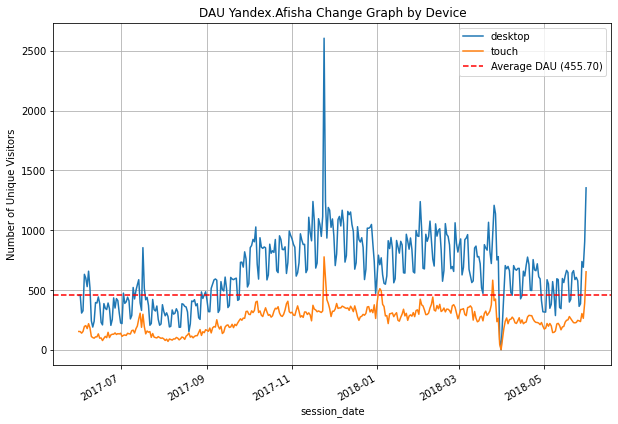

In [37]:
# Pivot the table to get DAU by device
dau_by_device = visit_log.pivot_table(index='session_date', columns='device', values='uid', aggfunc='nunique')

# Calculate the average DAU across all dates and devices
average_dau = dau_by_device.mean().mean()  # Calculate the average across both dates and devices

# Plot the DAU change graph
ax = dau_by_device.plot(grid=True, figsize=(10, 7))

# Add the average line
ax.axhline(y=average_dau, color='r', linestyle='--', label=f'Average DAU ({average_dau:.2f})')

plt.title('DAU Yandex.Afisha Change Graph by Device')
plt.ylabel('Number of Unique Visitors')
plt.legend()
plt.show()

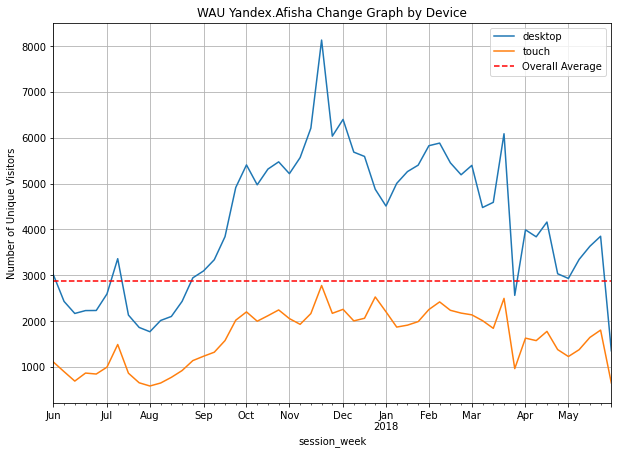

In [38]:
# WAU change graph by device
# Create the pivot table
waus_by_device = visit_log.pivot_table(index='session_week', columns='device', values='uid', aggfunc='nunique')

# Plot the WAU change graph
waus_by_device.plot(grid=True, figsize=(10, 7))
plt.title('WAU Yandex.Afisha Change Graph by Device')
plt.ylabel('Number of Unique Visitors')

# Calculate the overall average for all devices
overall_average = waus_by_device.mean(axis=1)

# Plot the average line
plt.axhline(overall_average.mean(), color='red', linestyle='--', label='Overall Average')
plt.legend()

plt.show()




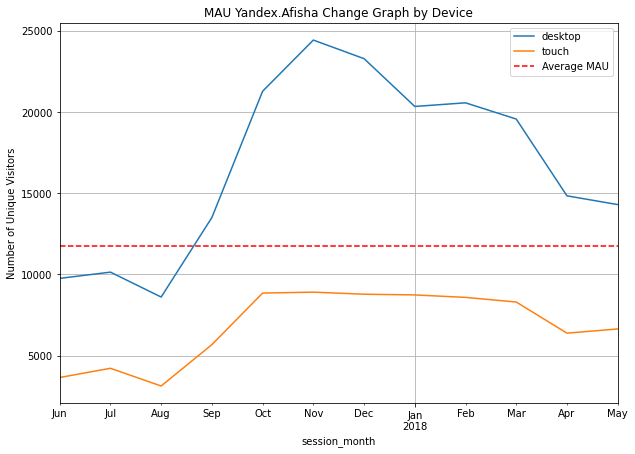

In [39]:
# Pivot table
mau_pivot = visit_log.pivot_table(index='session_month', columns='device', values='uid', aggfunc='nunique')

# Plot the data
ax = mau_pivot.plot(grid=True, figsize=(10, 7))
plt.title('MAU Yandex.Afisha Change Graph by Device')
plt.ylabel('Number of Unique Visitors')

# Calculate and plot the average line
average_mau = mau_pivot.mean().mean()  # Calculate the average across all months and devices
plt.axhline(average_mau, color='red', linestyle='--', label='Average MAU')  # Add the average line

# Show the legend
plt.legend()

plt.show()







The graph illustrates a consistent trend in both desktop and touch device visits, albeit with some distinctions. In December 2017, there is a minor drop in desktop visits, while touch devices maintain relatively stable viewership. Another noticeable decline in desktop traffic occurs in early April 2018. Despite these disparities, the overall pattern remains remarkably similar for both device types, with peaks and troughs occurring nearly simultaneously.

#### How many sessions are there per day? (One user might have more than one session.)

In [40]:
#Number of session per day
session_per_day=visit_log.groupby('session_date')['uid'].count().mean()

print(f"On average, there are {int(session_per_day)} sessions per day")

On average, there are 987 sessions per day


In [41]:
visit_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359386 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359386 non-null  category      
 1   end_ts         359386 non-null  datetime64[ns]
 2   source_id      359386 non-null  int64         
 3   start_ts       359386 non-null  datetime64[ns]
 4   uid            359386 non-null  uint64        
 5   session_year   359386 non-null  UInt32        
 6   session_month  359386 non-null  datetime64[ns]
 7   session_week   359386 non-null  datetime64[ns]
 8   session_date   359386 non-null  datetime64[ns]
dtypes: UInt32(1), category(1), datetime64[ns](5), int64(1), uint64(1)
memory usage: 24.0 MB


In [42]:
import pandas as pd

# Assuming you've already calculated sessions_per_user
sessions_per_user = visit_log.groupby(['session_date']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

# Reset the index to add 'session_date' as a column
sessions_per_user = sessions_per_user.reset_index()

# Display the table
display(sessions_per_user)


session_date  n_sessions  n_users  sessions_per_user
0     2017-06-01         664      605           1.097521
1     2017-06-02         658      608           1.082237
2     2017-06-03         477      445           1.071910
3     2017-06-04         510      476           1.071429
4     2017-06-05         893      820           1.089024
..           ...         ...      ...                ...
359   2018-05-27         672      620           1.083871
360   2018-05-28        1156     1039           1.112608
361   2018-05-29        1035      948           1.091772
362   2018-05-30        1410     1289           1.093871
363   2018-05-31        2244     1988           1.128773

[364 rows x 4 columns]

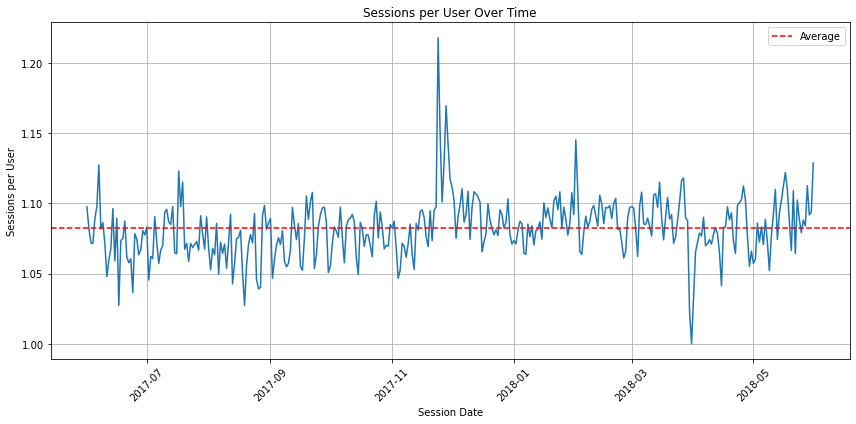

In [43]:
# Calculate the average sessions per user
average_sessions_per_user = sessions_per_user['sessions_per_user'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(sessions_per_user['session_date'], sessions_per_user['sessions_per_user'], linestyle='-')

# Add the average line
plt.axhline(y=average_sessions_per_user, color='r', linestyle='--', label='Average')

# Add labels and title
plt.xlabel('Session Date')
plt.ylabel('Sessions per User')
plt.title('Sessions per User Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


The number of sessions (n_sessions) appears to fluctuate between 1.05 and 1.10. However, between 2017-11 and 2018-01, the number of sessions jumps to 1.20, which may be due to holiday sessions. In addition, the number of sessions drops in 2018-04 to 1.00, which may indicate technical issues, such as website downtime or problems with tracking code, can also affect the number of sessions. If you suspect a technical issue might be causing a spike or drop in sessions, it's essential to investigate and address it promptly.

#### What is the length of each session?

Average session length 0    60
dtype: int64


Text(0.5, 1.0, 'Histogram of Session Duration')

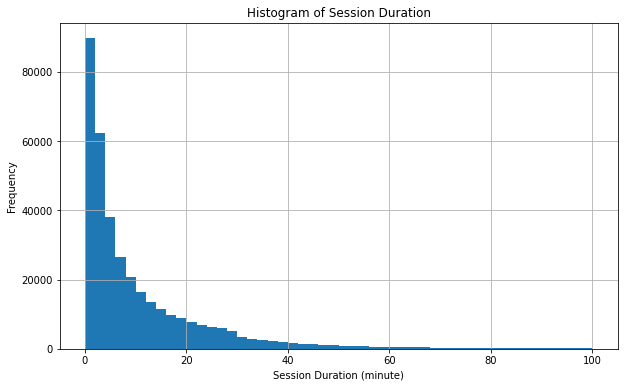

In [44]:
#Length of each session
#convert end_ts to the correct form
visit_log['end_ts'] = pd.to_datetime(
    visit_log['end_ts'], format="%Y-%m-%d %H:%M"
)
visit_log['session_duration_sec'] = (
    visit_log['end_ts'] - visit_log['start_ts']
).dt.seconds
#convert session into minutes
visit_log['session_duration_min']=visit_log['session_duration_sec']/60
#calculate average_session_length
asl=visit_log['session_duration_sec'].mode()
print('Average session length',asl)
#histogram for session length
visit_log['session_duration_min'].hist(bins=50,figsize=(10, 6),range=(0, 100))
plt.xlabel('Session Duration (minute)')
plt.ylabel('Frequency')
plt.title('Histogram of Session Duration')

In the provided code, the mode() function is used to calculate the mode of the session_duration_sec column, which represents the session duration in seconds.The mode is a statistical measure that identifies the most frequently occurring value in a dataset. In this context, it helps determine the most common session duration in seconds among the recorded sessions.

Regarding the provided description of the session duration histogram, it provides valuable insights into the distribution of session lengths. It mentions that most sessions are short, with a peak in frequency within the 0 to 10-minute range. There's also a secondary peak in the 24 to 26-minute range, suggesting sessions of moderate duration. After the 30-minute mark, the frequency of longer sessions decreases.




In [45]:
# 6. Let's see how often users come back by calculating sticky factors
# Calculate percentages
return_weekly_percentage = (dau_total / wau_total) * 100
return_monthly_percentage = (dau_total / mau_total) * 100
print("Those who return weekly: {:.2f}%".format(float(return_weekly_percentage)))
print("Those who return monthly: {:.2f}%".format(float(return_monthly_percentage)))

Those who return weekly: 16.15%
Those who return monthly: 3.91%


#### What is the user retention rate?

In [46]:
#create activity_date column
visit_log['activity_date'] = pd.to_datetime(visit_log['session_date'])
first_activity_date = visit_log.groupby(['uid'])['session_date'].min()
first_activity_date = pd.to_datetime(first_activity_date)
#change column name
first_activity_date.name = 'first_activity_date'
visit_log = visit_log.join(first_activity_date,on='uid')
# Calculate activity_month and first_activity_month
visit_log['activity_month'] = visit_log['activity_date'].astype('datetime64[M]')
visit_log['first_activity_month'] = visit_log['first_activity_date'].astype('datetime64[M]')






In [47]:
visit_log['cohort_lifetime']=(visit_log['activity_month']-visit_log['first_activity_month'])/ np.timedelta64(1,'M')
visit_log['cohort_lifetime'] = visit_log['cohort_lifetime'].round().astype('int')

In [48]:
cohorts = (
    visit_log.groupby(['first_activity_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_month', 'uid']
]
initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
)
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)
retention_pivot

cohort_lifetime        0         1         2         3         4         5   \
first_activity_month                                                          
2017-06-01            1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017-07-01            1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017-08-01            1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017-09-01            1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017-10-01            1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017-11-01            1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017-12-01            1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018-01-01            1.0  0.059715  0.039339  0.024973  0.020244       NaN   
2018-02-01            1.0  0.057080  0.025454  0.020093       NaN       NaN   
2018-03-01            1.0  0.041818  0.027053       NaN       NaN       NaN   
2018-04-01            1.0  0.048380       NaN       NaN       NaN       NaN   
2018-05-01            1.0       NaN       NaN       NaN       NaN       NaN   

cohort_lifetime             6         7         8         9         10  \
first_activity_month                                                     
2017-06-01            0.061015  0.057772  0.052342  0.050833  0.040652   
2017-07-01            0.045358  0.045738  0.038813  0.028615  0.027473   
2017-08-01            0.036342  0.039485  0.027895  0.026029       NaN   
2017-09-01            0.035860  0.024186  0.022809       NaN       NaN   
2017-10-01            0.021365  0.020364       NaN       NaN       NaN   
2017-11-01            0.021800       NaN       NaN       NaN       NaN   
2017-12-01                 NaN       NaN       NaN       NaN       NaN   
2018-01-01                 NaN       NaN       NaN       NaN       NaN   
2018-02-01                 NaN       NaN       NaN       NaN       NaN   
2018-03-01                 NaN       NaN       NaN       NaN       NaN   
2018-04-01                 NaN       NaN       NaN       NaN       NaN   
2018-05-01                 NaN       NaN       NaN       NaN       NaN   

cohort_lifetime             11  
first_activity_month            
2017-06-01            0.044951  
2017-07-01                 NaN  
2017-08-01                 NaN  
2017-09-01                 NaN  
2017-10-01                 NaN  
2017-11-01                 NaN  
2017-12-01                 NaN  
2018-01-01                 NaN  
2018-02-01                 NaN  
2018-03-01                 NaN  
2018-04-01                 NaN  
2018-05-01                 NaN

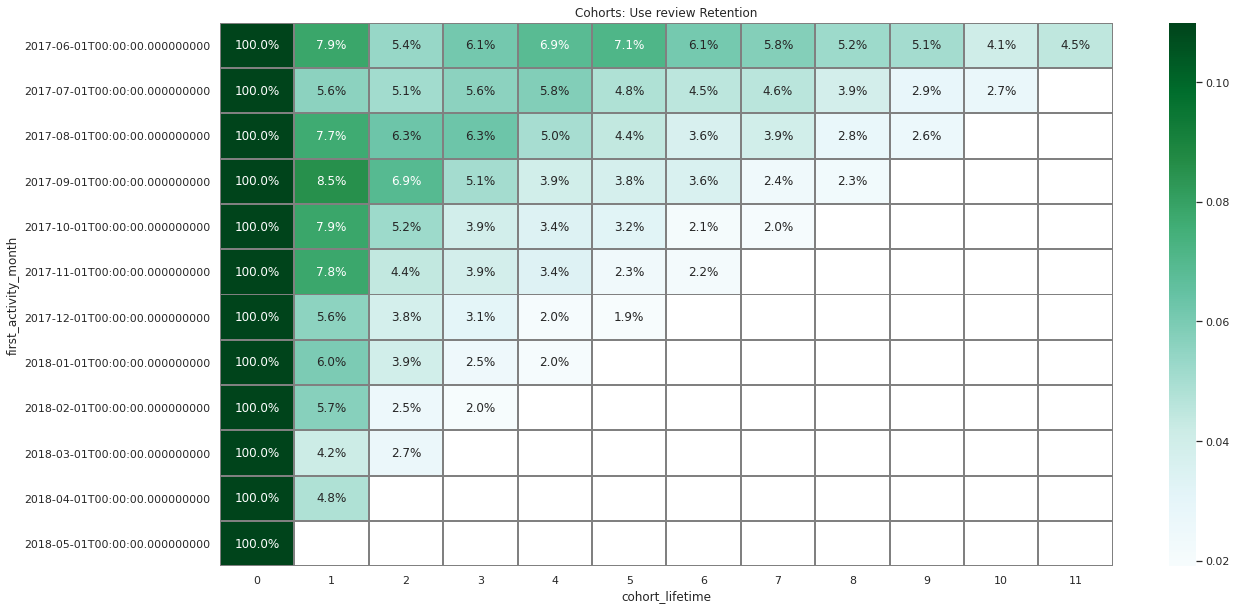

In [49]:
# Let's build the heatmap

sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: Use review Retention')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.11,cmap='BuGn')
b=ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

* General Trend: As the cohort lifetime increases, the retention rate generally tends to decrease. This is expected, as the longer the time since a user's first activity, the higher the chances they will drop off or become inactive.

* Early Drop-off: The first column for each cohort (cohort_lifetime = 0) shows the initial retention rate for that cohort. It indicates the percentage of users who continued their activity immediately after the first month. It's interesting to observe that the initial retention rates vary across cohorts.

* Long-Term Retention: The retention rates for cohort lifetimes beyond the first few months are lower, indicating that a significant portion of users stop using the platform after the initial period.

## Sales

* When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

* How many orders do they make during a given period of time?

* What is the average purchase size?

* How much money do they bring? (LTV)

#### When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

In [50]:

# Group orders by uid to find the first order date
first_order_date = order_log.groupby('uid')['buy_ts'].min()

# Group visits by uid to find the first visit date
first_visit_date = visit_log.groupby('uid')['start_ts'].min()

# Merge the first order and first visit dates
cohort_data = pd.merge(first_order_date, first_visit_date, on='uid', how='inner')
cohort_data.columns = ['First Order', 'First Visit']

# Calculate the difference in months between first order and first visit
cohort_data['Difference'] = ((cohort_data['First Order'] - cohort_data['First Visit']) / np.timedelta64(1, 'M')).astype(int)


# Create cohorts based on the first visit month
cohort_data['Cohort'] = cohort_data['First Visit'].dt.to_period('M')

# Pivot the data for cohort analysis
pivot_table = cohort_data.pivot_table(index='Cohort', columns='Difference', values='First Order', aggfunc='count')

# Calculate the total number of users in each cohort
total_users = pivot_table.iloc[:, 0]

# Calculate the conversion rate for each cohort and difference
conversion_rate_table = pivot_table.divide(total_users, axis=0)

# Display the pivot table of conversion rates
print(conversion_rate_table)




Difference   0         1         2         3         4         5         6   \
Cohort                                                                        
2017-06     1.0  0.043724  0.040903  0.056417  0.045604  0.040433  0.031970   
2017-07     1.0  0.050970  0.059834  0.040443  0.049861  0.039889  0.040443   
2017-08     1.0  0.067599  0.066045  0.053613  0.034188  0.031080  0.033411   
2017-09     1.0  0.061325  0.053557  0.031480  0.023712  0.035977  0.018397   
2017-10     1.0  0.058008  0.032535  0.025977  0.026482  0.015637  0.012358   
2017-11     1.0  0.058710  0.034730  0.034179  0.020948  0.019019  0.007166   
2017-12     1.0  0.048173  0.032392  0.019934  0.017165  0.010244       NaN   
2018-01     1.0  0.052818  0.021269  0.021624  0.009926       NaN       NaN   
2018-02     1.0  0.028352  0.020680  0.013676       NaN       NaN       NaN   
2018-03     1.0  0.025575  0.011326       NaN       NaN       NaN       NaN   
2018-04     1.0  0.023281       NaN       NaN       

In [51]:
#calculate number of days for conversion
# Assuming an average of 30.44 days in a month (considering varying month lengths)
cohort_data['Difference_in_day'] = cohort_data['Difference'] * 30.44

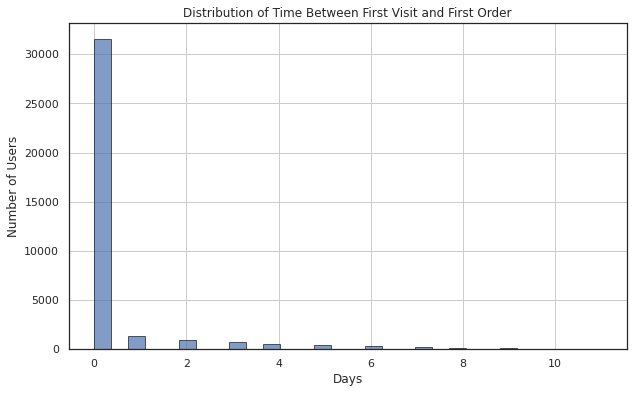

In [52]:
#histogram for number of days for conversion
plt.figure(figsize=(10, 6))
plt.hist(cohort_data['Difference'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Time Between First Visit and First Order')
plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

The bar graph show that majority of people buy products from the website within the same day.

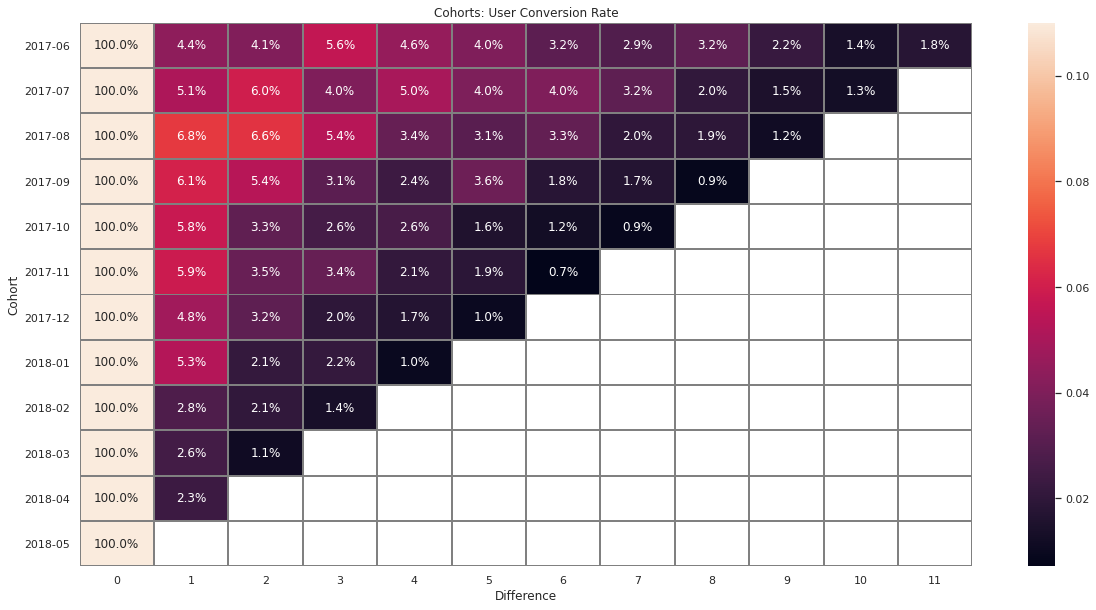

In [53]:
# Let's build the heatmap

sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Cohorts: User Conversion Rate')
ax = sns.heatmap(conversion_rate_table, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.11,)
b=ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

Conversion Rates:
   - As you move down the rows (cohorts) and across the columns (differences), you can observe how the conversion rates change for each cohort over time.
   - The conversion rates tend to decrease in the subsequent months, indicating that a smaller percentage of users make their first order as time passes since their first visit.

Retention and Engagement:
   - A higher initial conversion rate (Month 0) suggests that users from that cohort were more likely to make their first order immediately upon visiting the website.
   - As you go to later months (higher differences), you can see how the retention of users changes. A higher retention rate means a larger percentage of users from that cohort continue to make orders in the subsequent months.
   - For example, the cohort "2017-06" has a Month 0 conversion rate of 1.0, and the subsequent conversion rates gradually decline. This suggests that a larger proportion of users from this cohort made their first order upon visiting the website but fewer continued to make orders in the following months.




#### How many orders do they make during a given period of time?

In [54]:
# Assuming 'order_log' has a 'buy_ts' column
first_order = order_log.groupby(['uid'])['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_order']
first_order.head()



uid         first_order
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00

In [55]:
order_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50414 non-null  datetime64[ns]
 1   revenue  50414 non-null  float64       
 2   uid      50414 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


In [56]:
#merging the info on first_order to the purchase table we're working with
order_log=order_log.merge(first_order, how='left',on=['uid'])
order_log.head()

buy_ts  revenue                   uid         first_order
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00

In [57]:
#defining cohort month through first purchase
order_log['first_order_month']=order_log['first_order'].astype('datetime64[M]')
order_log.head()

buy_ts  revenue                   uid         first_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_order_month  
0        2017-06-01  
1        2017-06-01  
2        2017-06-01  
3        2017-06-01  
4        2017-06-01

In [58]:
#find month of buy_ts
order_log['month']=order_log['buy_ts'].astype('datetime64[M]')

In [59]:
#define cohort size
cohort_sizes = order_log.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','cohort_size']
cohort_sizes.head()

first_order_month  cohort_size
0        2017-06-01         2023
1        2017-07-01         1923
2        2017-08-01         1370
3        2017-09-01         2581
4        2017-10-01         4340

In [60]:
#calculating number of purchases for cohort and month
cohort=order_log.groupby(['first_order_month','month'])['revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']
#merge cohort with cohort size
cohort=cohort.merge(cohort_sizes,on=['first_order_month'])
cohort['age_month'] = ((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()
cohort['orders_per_buyer']=cohort['orders']/cohort['cohort_size']
cohort.head()

first_order_month      month  orders  cohort_size  age_month  \
0        2017-06-01 2017-06-01    2354         2023        0.0   
1        2017-06-01 2017-07-01     177         2023        1.0   
2        2017-06-01 2017-08-01     174         2023        2.0   
3        2017-06-01 2017-09-01     226         2023        3.0   
4        2017-06-01 2017-10-01     292         2023        4.0   

   orders_per_buyer  
0          1.163618  
1          0.087494  
2          0.086011  
3          0.111715  
4          0.144340

In [61]:
cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_piv.round(2).fillna('')

age_month          0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
first_order_month                                                               
2017-06-01         1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   2.1   
2017-07-01         1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47  1.49   
2017-08-01         1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   1.6   
2017-09-01         1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5         
2017-10-01         1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38               
2017-11-01         1.18  1.28  1.32  1.37  1.41  1.42  1.45                     
2017-12-01         1.15  1.21  1.26   1.3  1.32  1.34                           
2018-01-01         1.12  1.19  1.24  1.25  1.28                                 
2018-02-01         1.12  1.18  1.21  1.22                                       
2018-03-01         1.17  1.22  1.27                                             
2018-04-01         1.10  1.18                                                   
2018-05-01         1.09                                                         

age_month          10.0  11.0  
first_order_month              
2017-06-01         2.15  2.19  
2017-07-01         1.51        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

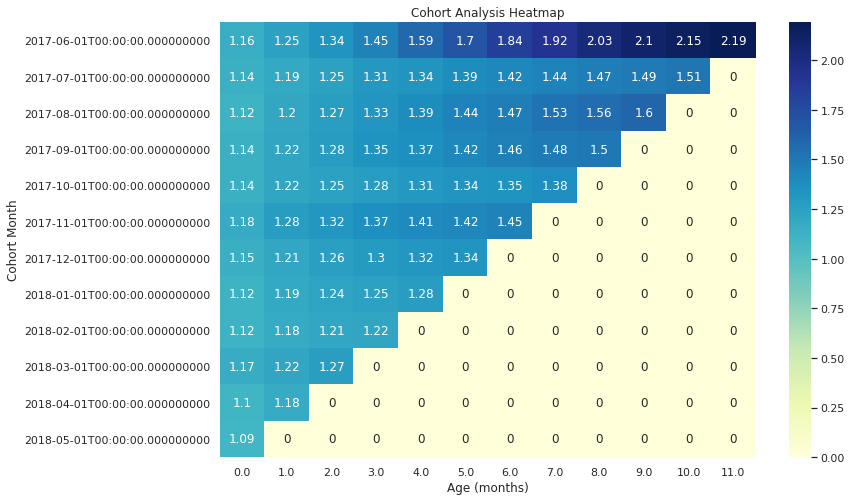

In [62]:
# Replace empty strings with 0 in the DataFrame
cohort_piv_cleaned = cohort_piv.round(2).fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_piv_cleaned, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Cohort Analysis Heatmap')
plt.xlabel('Age (months)')
plt.ylabel('Cohort Month')
plt.show()

Cohort Growth: As you move down the rows (from older cohorts to newer cohorts), you can observe that the number of orders per buyer tends to decrease. This suggests that earlier cohorts tend to make more orders per buyer than the newer cohorts.

Variance: While the general trend is a decrease in orders per buyer over time, there are exceptions. For example, the cohort starting in June 2017 shows an increase in orders per buyer between age_months 0 and 1 before decreasing.

#### What is the average purchase size?

In [63]:
#average purchase size
print('Average purchase size:', round(order_log['revenue'].mean(),2))

Average purchase size: 5.0


In [64]:
# Calculate the monthly average purchase size
monthly_avg_purchase = order_log.groupby(order_log['buy_ts'].dt.to_period('M'))['revenue'].mean()

# Write a conclusion
print('Monthly Average Purchase Size:')
print(monthly_avg_purchase)


Monthly Average Purchase Size:
buy_ts
2017-06    4.060106
2017-07    5.306589
2017-08    4.847139
2017-09    5.416448
2017-10    4.928280
2017-11    4.783518
2017-12    5.852139
2018-01    4.112927
2018-02    4.840095
2018-03    5.413930
2018-04    5.150645
2018-05    4.771279
Freq: M, Name: revenue, dtype: float64


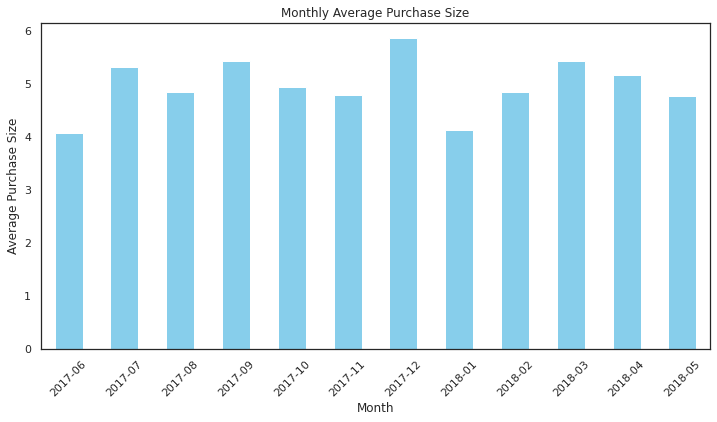

In [65]:
# Plot the monthly average purchase size
plt.figure(figsize=(12, 6))
monthly_avg_purchase.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Purchase Size')
plt.title('Monthly Average Purchase Size')
plt.xticks(rotation=45)
plt.show()


Increasing Trend: The data shows a general increasing trend in the monthly average purchase size from June 2017 to December 2017. During this period, the average purchase size steadily increased from around 4.06 to 5.85. This could indicate that customers were making larger purchases as time went on.

Seasonal Fluctuations: From January 2018 onwards, there is some fluctuation in the average purchase size. It shows a slight decrease in January, followed by an increase in February and March. This suggests some seasonal variations or changes in customer behavior.

Stability: Despite the fluctuations, the average purchase size generally remains within a relatively stable range between 4.06 and 5.85. There are no extreme spikes or drops, indicating a degree of consistency in customer spending patterns.

In [66]:
# How much money do they bring? (LTV)
#drop first_order_month
margin_rate=1
#get the revenue per cohort in each month
ltv_cohort=order_log.groupby(['first_order_month','month'])['revenue'].sum().reset_index()
ltv_cohort.columns = ['first_order_month','month','revenue']


In [67]:
#merge with the cohort size
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round()

In [68]:
#apply margin rate
ltv_cohort['revenue']=margin_rate*ltv_cohort['revenue']

In [69]:
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']
ltv_cohort

first_order_month      month   revenue  cohort_size  age       ltv
0         2017-06-01 2017-06-01   9557.49         2023  0.0  4.724414
1         2017-06-01 2017-07-01    981.82         2023  1.0  0.485329
2         2017-06-01 2017-08-01    885.34         2023  2.0  0.437637
3         2017-06-01 2017-09-01   1931.30         2023  3.0  0.954671
4         2017-06-01 2017-10-01   2068.58         2023  4.0  1.022531
..               ...        ...       ...          ...  ...       ...
73        2018-03-01 2018-04-01   1063.05         3533  1.0  0.300892
74        2018-03-01 2018-05-01   1114.87         3533  2.0  0.315559
75        2018-04-01 2018-04-01  10600.69         2276  0.0  4.657597
76        2018-04-01 2018-05-01   1209.92         2276  1.0  0.531599
77        2018-05-01 2018-05-01  13925.76         2988  0.0  4.660562

[78 rows x 6 columns]

In [70]:
#ltv pivot table
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

ltv_cohort_piv.round(2).fillna('')

age                0.0   1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0   \
first_order_month                                                               
2017-06-01         4.72  5.21  5.65    6.6   7.62   8.36   9.31   9.89  10.45   
2017-07-01         6.01  6.35  6.97   7.33    7.5   7.66   7.78   7.92   8.08   
2017-08-01         5.28  5.75  6.21    6.6   7.09   7.38   7.59   7.99   8.28   
2017-09-01         5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25  13.44   
2017-10-01         5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36          
2017-11-01         5.15  5.55  5.75   6.08   6.23   6.28    6.4                 
2017-12-01         4.74   5.0  5.92   6.99    7.3   7.64                        
2018-01-01         4.14  4.43  4.73   4.88   4.94                               
2018-02-01         4.16  4.44  4.51   4.59                                      
2018-03-01         4.84  5.14  5.46                                             
2018-04-01         4.66  5.19                                                   
2018-05-01         4.66                                                         

age                 9.0    10.0   11.0  
first_order_month                       
2017-06-01         11.05  11.62  11.88  
2017-07-01          8.23   8.39         
2017-08-01          8.47                
2017-09-01                              
2017-10-01                              
2017-11-01                              
2017-12-01                              
2018-01-01                              
2018-02-01                              
2018-03-01                              
2018-04-01                              
2018-05-01

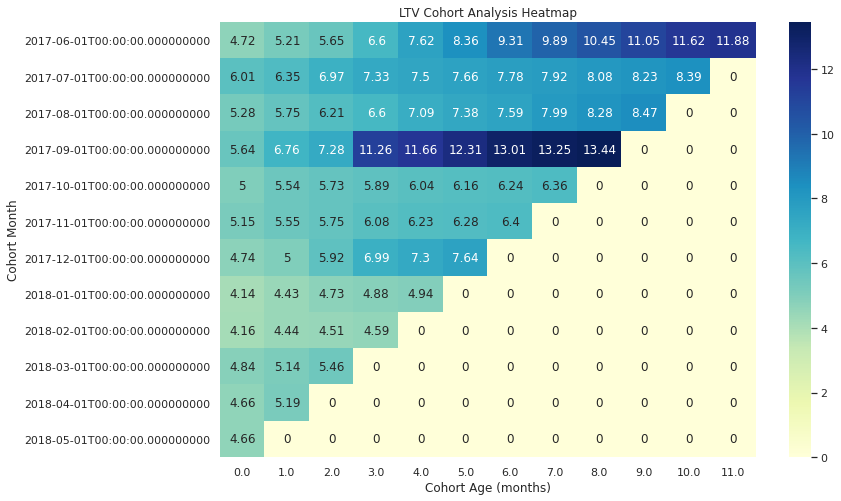

In [71]:
# Create the heatmap
# Replace empty strings with 0
ltv_cohort_piv_cleaned = ltv_cohort_piv.round(2).fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ltv_cohort_piv_cleaned, annot=True, cmap='YlGnBu', fmt='g')
plt.title('LTV Cohort Analysis Heatmap')
plt.xlabel('Cohort Age (months)')
plt.ylabel('Cohort Month')
plt.show()

Cohort Growth: You can observe how the LTV of each cohort grows over time. For example, looking at the values in the first row (2017-06-01 cohort), you can see how the LTV increases as the cohort ages. This indicates that customers from this cohort tend to spend more over time.

LTV Stability: Analyzing the diagonal from the top-left to the bottom-right (from age 0.0 to the highest age), you can assess whether LTV tends to stabilize or fluctuate as cohorts age. Cohorts that maintain or increase their LTV as they age are valuable, while those with declining LTV might need attention.

## Marketing

* How much money was spent? Overall, per source and over time.
* How much did customer acquisition from each of the sources cost?
* How worthwhile where the investments? (ROI)

#### How much money was spent? Overall, per source and over time.

In [72]:
#Money spend overall
overall_expense=cost_log['costs'].sum()
print("Overall expenses:", overall_expense)

Overall expenses: 329131.62


source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

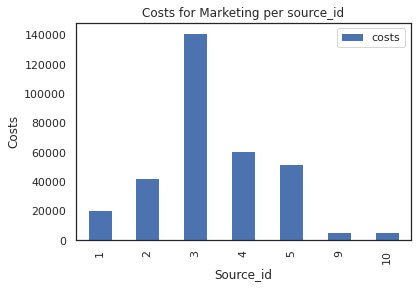

In [73]:
# expense per source
cost_per_source = cost_log.groupby('source_id')['costs'].sum().reset_index()
display(cost_per_source)

cost_per_source.plot(x='source_id', kind='bar')
plt.title('Costs for Marketing per source_id')
plt.ylabel('Costs', fontsize=12)
plt.xlabel('Source_id', fontsize=12)
plt.show()


source_id with number 3 is the one with the highest expense

In [74]:
cost_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


source_id        1        2         3        4        5       9       10
month_cost                                                              
2017-06-01  1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07-01  1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08-01   951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09-01  1502.01  2985.66   9963.55  5192.26  3849.14  415.62  460.67
2017-10-01  2315.75  4845.00  15737.24  6420.84  5767.40  609.41  627.24
2017-11-01  2445.16  5247.68  17025.34  5388.82  6325.34  683.18  792.36
2017-12-01  2341.20  4897.80  16219.52  7680.47  5872.52  657.98  645.86
2018-01-01  2186.18  4157.74  14808.78  5832.79  5371.52  547.16  614.35
2018-02-01  2204.48  4474.34  14228.56  5711.96  5071.31  551.50  480.88
2018-03-01  1893.09  3943.14  13080.85  5961.87  4529.62  480.29  526.41
2018-04-01  1327.49  2993.70   9296.81  4408.49  3501.15  373.49  388.25
2018-05-01  1467.61  2689.44   9411.42  4214.21  3669.56  362.17  409.86

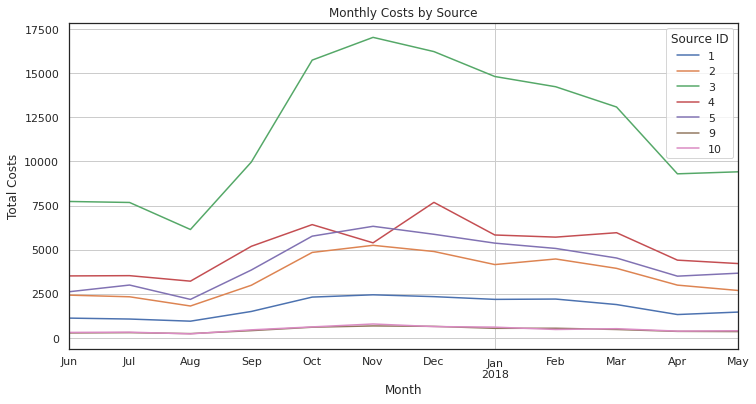

In [75]:
#alculate month cost
cost_log['month_cost']=cost_log['dt'].astype('datetime64[M]')
# Grouping by both 'dt' and 'source_id' and calculating the sum of costs
monthly_costs_by_source = cost_log.groupby(['month_cost', 'source_id'])['costs'].sum().reset_index()

# Creating a pivot table for monthly costs by source
pivot_table_costs_by_source = monthly_costs_by_source.pivot_table(
    index='month_cost', columns='source_id', values='costs', aggfunc='sum', fill_value=0
)

display(pivot_table_costs_by_source)
# Plotting the graph
plt.figure(figsize=(12, 6))
pivot_table_costs_by_source.plot(kind='line', ax=plt.gca())
plt.xlabel('Month')
plt.ylabel('Total Costs')
plt.title('Monthly Costs by Source')
plt.legend(title='Source ID')
plt.grid(True)
plt.show()


Source 3 (Blue Line): Source 3 consistently has the highest monthly costs throughout the observed period. This suggests that it's a significant investment in user acquisition. Costs for this source peaked around September-October 2017 and then gradually decreased.

Source 4 (Orange Line): Source 4 also demonstrates consistent and relatively high monthly costs. Similar to Source 3, it experienced a peak in costs around September-October 2017 but has shown fluctuations since then.

Source 5 (Green Line): Source 5 has the third-highest monthly costs. It shows a steady increase in costs over time, with some fluctuations. After January 2018, costs for Source 5 remained relatively stable.

Source 2 (Red Line): Source 2 follows a similar trend to Source 5, with steadily increasing monthly costs. The costs increased until around February 2018 and have since maintained a relatively stable level.

Source 1 (Purple Line): Source 1 has relatively lower monthly costs compared to the others. Its costs experienced some fluctuations but did not increase significantly over time.

Sources 9 and 10 (Brown and Pink Lines): Sources 9 and 10 have the lowest monthly costs among all the sources. Their costs remain relatively stable, with some minor fluctuations.

Overall, the trend suggests that there was an initial period of increased spending on user acquisition across several sources, with some of them maintaining high costs. However, in more recent months, there seems to be a trend of stabilizing or even decreasing costs for some sources. This could indicate a shift in marketing strategy or a response to the effectiveness of these sources in acquiring users. Further analysis would be needed to determine the impact of these trends on user acquisition and overall business performance.

From the period '2017-07' to '2017-12', there is a noticeable increase in expenses. However, a distinct overall trend of decreasing expenses is observed from '2018-01' to '2018-05', with varying degrees of reduction

#### How much did customer acquisition from each of the sources cost?


In [76]:
#How much did customer acquisition from each of the sources cost?
#find the month for marketing expense

marketing_by_month=cost_log.groupby(['month_cost'])['costs'].sum().reset_index()
marketing_by_month.head()

month_cost     costs
0 2017-06-01  18015.00
1 2017-07-01  18240.59
2 2017-08-01  14790.54
3 2017-09-01  24368.91
4 2017-10-01  36322.88

In [77]:
# create cohort for number of buyer per month
buyers_per_month=order_log.groupby(['first_order_month'])['uid'].nunique().reset_index()
buyers_per_month.columns=['month_cost','buyers']
buyers_per_month.head()

month_cost  buyers
0 2017-06-01    2023
1 2017-07-01    1923
2 2017-08-01    1370
3 2017-09-01    2581
4 2017-10-01    4340

In [78]:
#calculate CAC per month
CAC_per_month=marketing_by_month.merge(buyers_per_month,how='left',on=['month_cost'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month

month_cost     costs  buyers        CAC
0  2017-06-01  18015.00    2023   8.905091
1  2017-07-01  18240.59    1923   9.485486
2  2017-08-01  14790.54    1370  10.796015
3  2017-09-01  24368.91    2581   9.441654
4  2017-10-01  36322.88    4340   8.369327
5  2017-11-01  37907.88    4081   9.288870
6  2017-12-01  38315.35    4383   8.741809
7  2018-01-01  33518.52    3373   9.937302
8  2018-02-01  32723.03    3651   8.962758
9  2018-03-01  30415.27    3533   8.608907
10 2018-04-01  22289.38    2276   9.793225
11 2018-05-01  22224.27    2988   7.437841

In [79]:
#average CAC
average_cac = CAC_per_month['CAC'].mean()
print("Average CAC:", average_cac)

Average CAC: 9.147357292482544


In [80]:
#plot line for CAC for month
fig = px.line(CAC_per_month, x="month_cost", y="CAC", title='CAC')
fig.show()

 The CAC values seem to fluctuate over time, with some months having higher CAC values and others having lower ones. The overall trend indicates variations in the cost of acquiring customers.
  Depending on the nature of the business, there might be some seasonality in customer acquisition costs. For instance, the CAC in November and December 2017 is relatively high, which could be due to increased marketing spending during the holiday season.

#### CAC per source

In [81]:
visit_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359386 entries, 0 to 359399
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   device                359386 non-null  category      
 1   end_ts                359386 non-null  datetime64[ns]
 2   source_id             359386 non-null  int64         
 3   start_ts              359386 non-null  datetime64[ns]
 4   uid                   359386 non-null  uint64        
 5   session_year          359386 non-null  UInt32        
 6   session_month         359386 non-null  datetime64[ns]
 7   session_week          359386 non-null  datetime64[ns]
 8   session_date          359386 non-null  datetime64[ns]
 9   session_duration_sec  359386 non-null  int64         
 10  session_duration_min  359386 non-null  float64       
 11  activity_date         359386 non-null  datetime64[ns]
 12  first_activity_date   359386 non-null  datetime64[ns]
 13 

In [82]:
#let define the main source
first_main_s=visit_log.sort_values('activity_date').groupby('uid').first()['source_id'].reset_index()
first_main_s.columns=['uid','first_source']
first_main_s.head()

uid  first_source
0   11863502262781             3
1   49537067089222             2
2  297729379853735             3
3  313578113262317             2
4  325320750514679             5

In [83]:
order_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   buy_ts             50414 non-null  datetime64[ns]
 1   revenue            50414 non-null  float64       
 2   uid                50414 non-null  uint64        
 3   first_order        50414 non-null  datetime64[ns]
 4   first_order_month  50414 non-null  datetime64[ns]
 5   month              50414 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), uint64(1)
memory usage: 2.7 MB


In [84]:
#merge with order_log
order_log=order_log.merge(first_main_s,on=['uid'],how='left')
order_log.head()

buy_ts  revenue                   uid         first_order  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_order_month      month  first_source  
0        2017-06-01 2017-06-01             1  
1        2017-06-01 2017-06-01             2  
2        2017-06-01 2017-06-01             2  
3        2017-06-01 2017-06-01             2  
4        2017-06-01 2017-06-01             3

In [85]:
cost_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   source_id   2542 non-null   int64         
 1   dt          2542 non-null   datetime64[ns]
 2   costs       2542 non-null   float64       
 3   month_cost  2542 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 79.6 KB


In [86]:
#find cost per month
cost_by_month_source=cost_log.groupby(['month_cost','source_id'])['costs'].sum().reset_index()
cost_by_month_source.head()

month_cost  source_id    costs
0 2017-06-01          1  1125.61
1 2017-06-01          2  2427.38
2 2017-06-01          3  7731.65
3 2017-06-01          4  3514.80
4 2017-06-01          5  2616.12

In [87]:
#number of buyers per month
numb_buyers_per_moth_source=order_log.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
numb_buyers_per_moth_source.columns=['month_cost','source_id','buyers']
numb_buyers_per_moth_source.head()

month_cost  source_id  buyers
0 2017-06-01          1     210
1 2017-06-01          2     240
2 2017-06-01          3     620
3 2017-06-01          4     401
4 2017-06-01          5     394

In [88]:
#cac per month
CAC_per_month_source=cost_by_month_source.merge(numb_buyers_per_moth_source,how='left',on=['month_cost','source_id'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

month_cost  source_id    costs  buyers        CAC
0 2017-06-01          1  1125.61     210   5.360048
1 2017-06-01          2  2427.38     240  10.114083
2 2017-06-01          3  7731.65     620  12.470403
3 2017-06-01          4  3514.80     401   8.765087
4 2017-06-01          5  2616.12     394   6.639898

In [89]:
# Create a pivot table
pivot_table_cac = CAC_per_month_source.pivot_table(index='source_id', columns='month_cost', values='CAC', aggfunc='sum')

display(pivot_table_cac)

month_cost  2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
source_id                                                                
1             5.360048    5.676614    7.554048    5.563000    5.746278   
2            10.114083   10.902383   14.488400   13.448919   11.759709   
3            12.470403   15.598313   18.616788   13.231806   14.126786   
4             8.765087    7.045369    9.661742    9.061536    5.702345   
5             6.639898    7.054447    6.070222    6.436689    5.976580   
9             4.456563    5.932157    4.219153    4.947857    5.078417   
10            3.342766    6.467059    6.460278    5.687284    3.136200   

month_cost  2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
source_id                                                                
1             6.112900    6.096875    7.978759    6.954196    5.971893   
2            13.152080   12.368182   14.238836   15.065118   11.631681   
3            14.689681   12.761227   15.188492   13.641956   14.156764   
4             4.706393    5.689237    5.792244    5.293753    5.738085   
5             8.846629    7.528872    8.138667    7.152764    7.891324   
9             4.950580    5.576102    7.105974    6.488235    3.039810   
10            6.338880    7.688810    6.981250    3.974215    2.892363   

month_cost  2018-04-01  2018-05-01  
source_id                           
1             6.351627    5.395625  
2            14.054930    6.543650  
3            15.468902   11.491355  
4             6.679530    5.354778  
5             7.780333    7.153138  
9             8.892619    6.244310  
10            3.844059    3.202031

In [90]:
#plotting cac dynamics
fig = px.line(CAC_per_month_source, x="month_cost", y="CAC",color='source_id',title='CAC')
fig.show()

Source 1:

CAC fluctuates over time, with some months showing higher costs (e.g., August 2017 and February 2018).
There is a peak in CAC in January 2018.
Overall, there is variability in CAC but no clear increasing or decreasing trend.

Source 2:

Source 2 generally has a higher CAC compared to other sources.
CAC increases significantly from July 2017 to August 2017, then fluctuates.
There's a drop in CAC in May 2018.
Overall, CAC for Source 2 is high and fluctuates.

Source 3:

CAC is relatively stable, with minor fluctuations.
There's a peak in CAC in February 2018.
Overall, CAC for Source 3 remains steady.

Source 4:

CAC fluctuates but remains relatively low compared to other sources.
There's a drop in CAC in October 2017.
Source 4 shows the lowest CAC in April 2018.
Overall, CAC for Source 4 is low and fluctuates.

Source 5:

CAC is moderate and fluctuates slightly over time.
There's a peak in CAC in November 2017.
Source 5 shows higher CAC in the later months of the dataset.
Overall, CAC for Source 5 is moderate and varies.

Source 9:

CAC fluctuates, with some months showing higher costs (e.g., January 2018 and April 2018).
Source 9 shows the highest CAC in April 2018.
Overall, CAC for Source 9 fluctuates and shows peaks in some months.

Source 10:

CAC fluctuates and is generally lower than some other sources.
Source 10 has the lowest CAC in March 2018.
There's a peak in CAC in July 2017.
Overall, CAC for Source 10 fluctuates and is relatively low.

#### How worthwhile where the investments? (ROI)

In [91]:
order_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   buy_ts             50414 non-null  datetime64[ns]
 1   revenue            50414 non-null  float64       
 2   uid                50414 non-null  uint64        
 3   first_order        50414 non-null  datetime64[ns]
 4   first_order_month  50414 non-null  datetime64[ns]
 5   month              50414 non-null  datetime64[ns]
 6   first_source       50414 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(1), uint64(1)
memory usage: 3.1 MB


In [92]:
#CAC per month merge with ltv_cohort
CAC_per_month_ROI=CAC_per_month[['month_cost','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']
ROI=ltv_cohort.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

first_order_month      month  revenue  cohort_size  age       ltv       CAC
0        2017-06-01 2017-06-01  9557.49         2023  0.0  4.724414  8.905091
1        2017-06-01 2017-07-01   981.82         2023  1.0  0.485329  8.905091
2        2017-06-01 2017-08-01   885.34         2023  2.0  0.437637  8.905091
3        2017-06-01 2017-09-01  1931.30         2023  3.0  0.954671  8.905091
4        2017-06-01 2017-10-01  2068.58         2023  4.0  1.022531  8.905091

In [93]:
#calculate ROI and create a pivot table
ROI['ROI']=ROI['ltv']/ROI['CAC']
roi_pivotable = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 
roi_pivotable

age                0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
first_order_month                                                               
2017-06-01         0.53  0.59  0.63  0.74  0.86  0.94  1.05  1.11  1.17  1.24   
2017-07-01         0.63  0.67  0.73  0.77  0.79  0.81  0.82  0.84  0.85  0.87   
2017-08-01         0.49  0.53  0.57  0.61  0.66  0.68  0.70  0.74  0.77  0.78   
2017-09-01         0.60  0.72  0.77  1.19  1.23  1.30  1.38  1.40  1.42   NaN   
2017-10-01         0.60  0.66  0.68  0.70  0.72  0.74  0.75  0.76   NaN   NaN   
2017-11-01         0.55  0.60  0.62  0.65  0.67  0.68  0.69   NaN   NaN   NaN   
2017-12-01         0.54  0.57  0.68  0.80  0.84  0.87   NaN   NaN   NaN   NaN   
2018-01-01         0.42  0.45  0.48  0.49  0.50   NaN   NaN   NaN   NaN   NaN   
2018-02-01         0.46  0.49  0.50  0.51   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01         0.56  0.60  0.63   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01         0.48  0.53   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01         0.63   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

age                10.0  11.0  
first_order_month              
2017-06-01         1.31  1.33  
2017-07-01         0.88   NaN  
2017-08-01          NaN   NaN  
2017-09-01          NaN   NaN  
2017-10-01          NaN   NaN  
2017-11-01          NaN   NaN  
2017-12-01          NaN   NaN  
2018-01-01          NaN   NaN  
2018-02-01          NaN   NaN  
2018-03-01          NaN   NaN  
2018-04-01          NaN   NaN  
2018-05-01          NaN   NaN

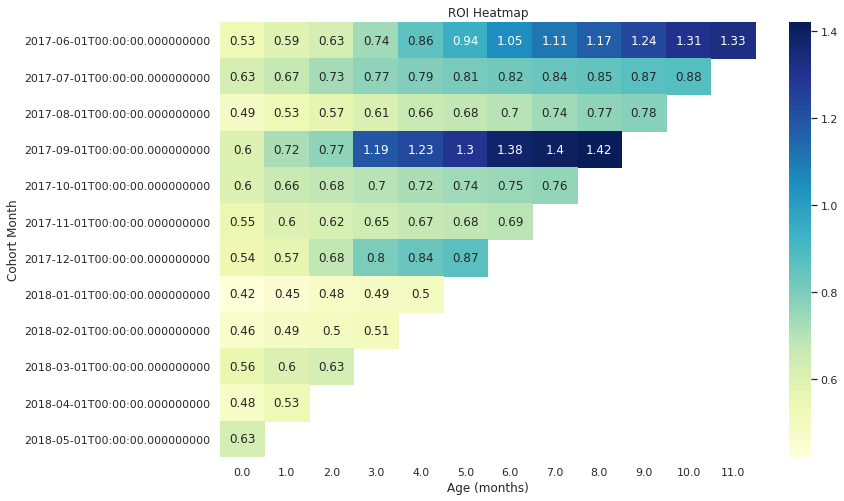

In [94]:
#create a haetmap
plt.figure(figsize=(12, 8))
sns.heatmap(roi_pivotable, annot=True, cmap='YlGnBu', fmt='g')
plt.title('ROI Heatmap')
plt.xlabel('Age (months)')
plt.ylabel('Cohort Month')
plt.show()

 In some cohorts (e.g., September 2017), the CAC seems to increase as the customer cohort ages. This can be a sign of increasing competition or marketing costs.
 
 In contrast, some cohorts (e.g., June 2017) show a decreasing CAC as the cohort ages. This could be due to efficient marketing strategies or better customer retention.
 
 

In [95]:
order_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   buy_ts             50414 non-null  datetime64[ns]
 1   revenue            50414 non-null  float64       
 2   uid                50414 non-null  uint64        
 3   first_order        50414 non-null  datetime64[ns]
 4   first_order_month  50414 non-null  datetime64[ns]
 5   month              50414 non-null  datetime64[ns]
 6   first_source       50414 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(1), uint64(1)
memory usage: 3.1 MB


In [96]:
#create cohort ltv per source
ltv_per_source = order_log.groupby(['first_source'])[['uid', 'revenue']].agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
ltv_per_source.columns = ['source_id', 'buyers', 'revenue']
ltv_per_source['ltv'] = ltv_per_source['revenue'] / ltv_per_source['buyers']
ltv_per_source


source_id  buyers   revenue        ltv
0          1    3371  34175.22  10.138007
1          2    3560  46037.05  12.931756
2          3   10101  51737.92   5.122059
3          4   10001  55426.93   5.542139
4          5    7143  54821.52   7.674859
5          7       1      1.22   1.220000
6          9    1054   5581.79   5.295816
7         10    1291   4272.13   3.309163

In [97]:
#calculate roi per source
roi_per_source = cost_per_source.merge(ltv_per_source, on=['source_id'])
roi_per_source['cac'] = roi_per_source['costs'] / roi_per_source['buyers']
roi_per_source['romi'] = roi_per_source['ltv'] / roi_per_source['cac']
roi_per_source


source_id      costs  buyers   revenue        ltv        cac      romi
0          1   20833.27    3371  34175.22  10.138007   6.180145  1.640416
1          2   42806.04    3560  46037.05  12.931756  12.024169  1.075480
2          3  141321.63   10101  51737.92   5.122059  13.990855  0.366101
3          4   61073.60   10001  55426.93   5.542139   6.106749  0.907543
4          5   51757.10    7143  54821.52   7.674859   7.245849  1.059208
5          9    5517.49    1054   5581.79   5.295816   5.234810  1.011654
6         10    5822.49    1291   4272.13   3.309163   4.510062  0.733729

In [98]:
# create a bar graph for ROI per source
fig = px.bar(roi_per_source, x='source_id', y='romi')
fig.update_xaxes(type='category')
fig.show()

Based on ROMI, you should consider increasing the flow from Source IDs 1 and 5 as they have the highest ROMI values, indicating efficiency. Source IDs 2 and 9 also have positive ROMI values, so maintaining or optimizing them might be appropriate. On the other hand, Source IDs 3 and 4 have ROMI values below 1, suggesting that you may need to evaluate and potentially reduce investment in these sources. Source ID 10 falls in a similar category and should be assessed for optimization.

###  Write a conclusion: advise marketing experts how much money to invest and where.

##### Source ID Allocation:

* Source IDs 1 and 5: These sources exhibit the highest ROMI values, indicating efficient utilization of marketing resources. We recommend increasing investments in Source IDs 1 and 5 to further capitalize on their performance.

* Source IDs 2 and 9: While Source ID 2 has a positive ROMI, it's relatively high-cost. Maintaining or optimizing this source should be considered. Source ID 9, despite its lower costs, also exhibits a positive ROMI, suggesting its continued use or optimization.

* Source IDs 3 and 4: These sources have ROMI values below 1, indicating that the return on investment is not favorable. It is advisable to evaluate and potentially reduce investments in these sources.

* Source ID 10: Source ID 10 also has a ROMI below 1 and should be assessed for optimization or reevaluation.
Cost Allocation:

* Cost allocation should be strategic and flexible, with a focus on periods of higher user acquisition and conversion, such as during the holiday season.

* Seasonal fluctuations in CAC should be anticipated, and budgets adjusted accordingly.

##### Cohort Retention Analysis:

* The analysis of cohort retention highlights the importance of an effective onboarding process. The cohort that initially joined in June 2017 demonstrated exceptional retention, indicating successful initial user experiences. Strategies from this cohort's success should be applied to onboard new users effectively.

#### Conversion Rate Optimization:

* The consistent decline in conversion rates across cohorts as they age underscores the importance of retaining user engagement during the early stages of interaction with the platform. Personalized onboarding, tailored promotions, and clear calls-to-action can encourage users to convert more swiftly and contribute to sustained conversion rates.

#### Session Optimization:

The majority of sessions are relatively short, emphasizing the need to design sessions to be brief and user-friendly.
LTV Analysis:

* Cohorts tend to exhibit growth in LTV as they age, suggesting that users engage more and spend more as they become more familiar with the platform.

* The "2017-09-01" cohort stood out with the highest LTV after six months, indicating robust engagement and revenue generation during that period.
Focus on High-Performing Sources:

* Allocate a significant portion of the budget to high-performing sources, such as Source IDs 1 and 5, which consistently demonstrate positive ROMI.

##### Continuous Monitoring and Optimization:

* Continuously monitor metrics like CAC, ROMI, and cohort retention to make data-driven decisions.

##### Monthly Costs by Source:

* The analysis of monthly costs by source reveals varying trends among different sources. While some sources, like Source 3 and Source 4, initially invested heavily but showed decreasing costs, others like Source 2 and Source 5 maintained or increased their costs steadily. Source 1 had relatively lower and stable costs.

* These cost trends should be considered alongside ROMI when making allocation decisions.

In summary, these recommendations emphasize a data-driven and flexible approach to marketing budget allocation. By increasing investments in efficient sources, optimizing onboarding, focusing on user engagement, and carefully monitoring cost trends, the marketing team can make more informed decisions to drive growth and improve ROI. The observed cost trends among different sources provide valuable insights into the effectiveness of past strategies, guiding future allocation decisions.






